In [0]:
import os
from scipy.io import wavfile
import numpy as np
import scipy
import scipy.signal
import soundfile as sf
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv
from collections import namedtuple
import datetime
import time

Connect to google drive "Stethoscope for the rainforests"

In [37]:
drive.mount('/content/drive')
os.chdir('/content/drive/Shared drives/Stethoscope for the rainforests/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Get the labels <br>
Low and highFrequencies are in col 5 and 6. <br>
File path is in col 7. <br>
Begin clock time is in col 10. <br>
Use the start and end clock time (in col 3,4) adding to the begin clock time to decide the time period. <br>
Sonotype is in col 11.

Q: Selection 269, 377, 1157, 1428, sonotype is alphabet? <br>

269	Spectrogram 1	1	153655.481400000	153697.202500000	530.949	991.625	C:\Users\Tatiana\Documents\Sound Forest Lab\taxon_group_recordings\13A\13A_audios\20180809_180000_13A_24H [1.4452 116.9811].wav	2018/8/9	41.7211	18:18:00.4814	A	-	0


In [91]:
labelFile = "Training data set /Table_13A_10.txt"

times = [] 
freqs = []
files = []
sonotypes = []

with open(labelFile) as file:
  label_reader = csv.reader(file, delimiter='\t')
  for row in label_reader:
      # not use the first row
      if (not row[0].isnumeric()):
        continue

      # all the recording are either start at 0min or 30mins
      timeWeight = [60,1,0.1]
      str = sum([a*b for a,b in zip(timeWeight, map(int,row[10].replace('.',":").split(':')))]) % 1800
      end = str + float(row[4]) - float(row[3])

      try:
        sonotypes.append(int(row[11]))
        times.append([str,end])
        freqs.append([float(row[5]), float(row[6])])
        files.append(row[7].split("\\")[-1]) 
      except:
        # selection number
        print(row[0])
        pass

print("dataset size:  %i" % len(times))    
print("filename sample: " + files[0])

269
377
1157
1428
dataset size:  1233
filename sample: 3B_20180607_070500_Dawn_Sunrise_Based.wav


Get the data according to the labels.

In [93]:
# all the sound files
fileDir = "Sound data/EastKalimantan/13A/"
soundFiles = os.listdir(fileDir)
usedFiles = np.intersect1d(soundFiles, files)

# get spectrogram data
specs = [None] * len(times) #list storing spectrogram data

for curFile in usedFiles:
  filePath = fileDir + curFile
  audio, rate = sf.read(filePath)

  # plot the spectrogram
  freq, t, spec = scipy.signal.spectrogram(audio, rate)
  for i in range(len(files)):
    if(files[i] == curFile):
      boxT = times[i]
      boxFreq = freqs[i]

      # get low and high freq index of the box
      low_freq = np.argmin(np.abs(freq - boxFreq[0]))
      high_freq = np.argmin(np.abs(freq - boxFreq[1]))
      # get start and end time of the box
      start = np.argmin(np.abs(t - boxTime[0]))
      end = np.argmin(np.abs(t - boxTime[1]))

      # adjust the params to cover the whole box
      if freq[low_freq] > boxFreq[0]: 
        low_freq = low_freq -1

      if freq[high_freq] < boxFreq[1]: 
        high_freq = high_freq + 1

      if time[start] > time[0]: 
        start = start - 1

      if time[end] < time[1]: 
        start = start + 1

      specs[i] = spec[low_freq:high_freq, start:end]
      # boxFreqPlt = freq[low_freq: high_freq]
      # boxTPlt = t[start:end]

  

1233


Test whether the boxes are interpreted correctly

NameError: ignored

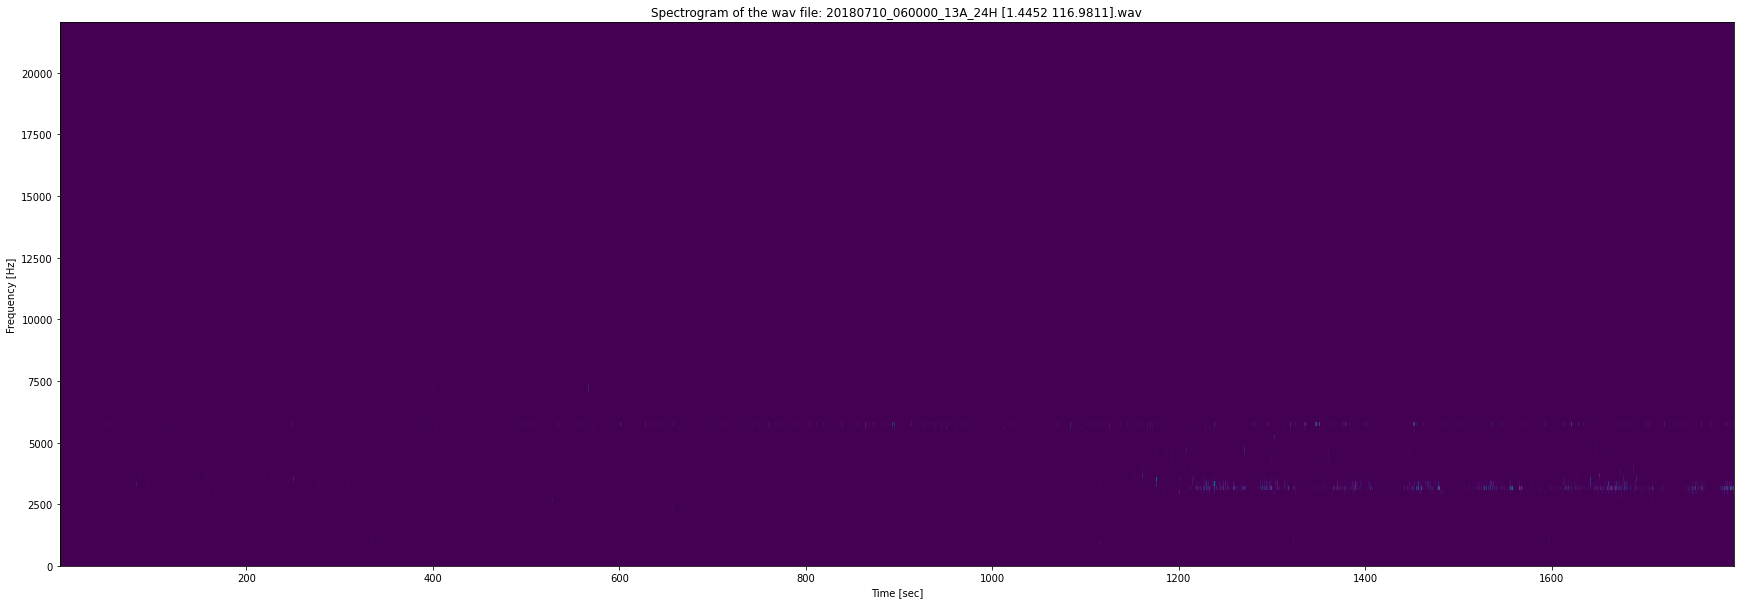

In [98]:
pltFile = usedFiles[0]
filePath = fileDir + pltFile
audio, rate = sf.read(filePath)

# set up
plt.figure(figsize=(30, 10))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Spectrogram of the wav file: " + pltFile)

# plot spectrogram
freq, t, spec = scipy.signal.spectrogram(audio, rate)
plt.pcolormesh(t, freq, spec)
# plt.pcolormesh(wholeT, wholeFreq, wholeSpec)

# Create Rectangle patches
for i in range(len(times)):
   if(files[i] == pltFile):
      boxT = times[i]
      boxFreq = freqs[i]

      # get low and high freq index of the box
      low_freq = np.argmin(np.abs(freq - boxFreq[0]))
      high_freq = np.argmin(np.abs(freq - boxFreq[1]))
      # get start and end time of the box
      start = np.argmin(np.abs(t - boxTime[0]))
      end = np.argmin(np.abs(t - boxTime[1]))

      # adjust the params to cover the whole box
      if freq[low_freq] > boxFreq[0]: 
        low_freq = low_freq -1

      if freq[high_freq] < boxFreq[1]: 
        high_freq = high_freq + 1

      if time[start] > time[0]: 
        start = start - 1

      if time[end] < time[1]: 
        start = start + 1
          
      ymin = freq[low_freq]/freq[len(freq) -1]
      ymax = freq[high_freq]/freq[len(freq) -1]
      xmin = time[start]
      xmax = time[end]
      plt.axvspan(xmin, xmax, ymin=ymin, ymax=ymax, fill = False)